In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

## Graph Customisation Settings

In [2]:
show_outliers = True
title_size = 14
axis_label_size = 12
fig_size = (3.0, 2.0) # Default values are (6.4, 4.8) in inches
box_width = 0.5

pie_colors = ['SkyBlue', 'LightGreen']
box_colors = ['SkyBlue', 'LightGreen']

def applyColor(bplot):
    for patch, color in zip(bplot['boxes'], box_colors):
        patch.set_facecolor(color)

# 1.0 Data Understanding of Raw Dataset

In [3]:
raw_df = pd.read_csv('train.csv')

In [4]:
raw_df['total_words_q1'] = (raw_df['question1']).str.split().str.len()
raw_df['total_words_q2'] = raw_df['question2'].str.split().str.len()

In [5]:
raw_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,total_words_q1,total_words_q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,14.0,12.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,8.0,13.0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,14.0,10.0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,11.0,9.0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,13.0,7.0


## 1.1 Length of Questions

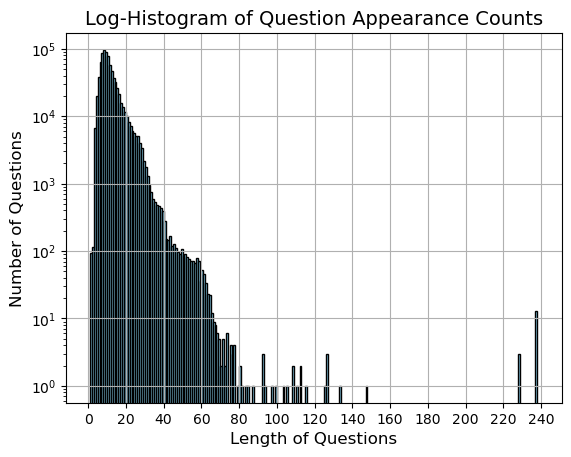

<Figure size 300x200 with 0 Axes>

In [12]:
total_words_df = pd.concat([raw_df['total_words_q1'],raw_df['total_words_q2']])
fig, ax = plt.subplots()
plt.hist(total_words_df, color = 'SkyBlue', ec = 'black', bins = range(0,240,1), log=True)
plt.title('Log-Histogram of Question Appearance Counts', fontsize = title_size)
plt.xlabel('Length of Questions', fontsize = axis_label_size)
plt.ylabel('Number of Questions', fontsize = axis_label_size)
plt.grid(visible = 'True')
plt.xticks(range(0,250,20))
plt.figure(figsize = fig_size)
plt.show()

In [9]:
print("Length of Questions")
print(total_words_df.describe())

Length of Questions
count    808577.000000
mean         11.062138
std           5.884574
min           1.000000
25%           7.000000
50%          10.000000
75%          13.000000
max         237.000000
dtype: float64


## 1.2 Question Pair

In [7]:
print('Total Number of Question Pairs: {}'.format(len(raw_df)))

Total Number of Question Pairs: 404290


In [8]:
qids = pd.Series(raw_df['qid1'].tolist() + raw_df['qid2'].tolist())
print('Number of Questions That Appear More Than Once: {}'.format(np.sum(qids.value_counts() > 1)))
print('Number of Unique Questions: {}'.format(len(np.unique(qids))))

Number of Questions That Appear More Than Once: 111780
Number of Unique Questions: 537933


## 1.3 Imbalance of Data

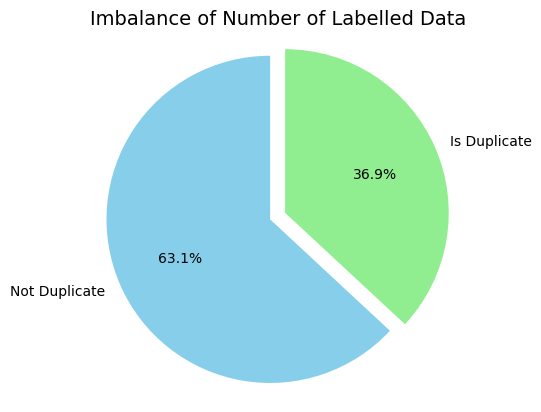

<Figure size 300x200 with 0 Axes>

In [7]:
raw_label_groups = raw_df.groupby('is_duplicate')
raw_df_0 = raw_label_groups.get_group(0)
raw_df_1 = raw_label_groups.get_group(1)

raw_count_0 = raw_df_0['is_duplicate'].count()
raw_count_1 = raw_df_1['is_duplicate'].count()

plt.pie( [raw_count_0, raw_count_1],
         labels = ['Not Duplicate', 'Is Duplicate'],
         explode = [0.1, 0],
         autopct = '%1.1f%%',
         startangle = 90,
         colors = pie_colors )

plt.title('Imbalance of Number of Labelled Data', fontsize = title_size)
plt.axis('equal')
plt.figure(figsize = fig_size)
plt.show()

In [8]:
print('Number of Datapoints Labelled 0:', raw_count_0)
print('Number of Datapoints Labelled 1:', raw_count_1)

Number of Datapoints Labelled 0: 255027
Number of Datapoints Labelled 1: 149263


## 1.3 Bag of Words

In [9]:
bag_of_words_dict = {}

def add_words(qns):
    words = re.sub(r"[^a-zA-Z0-9]", " ", str(qns).lower().strip()).split() #remove puntuation & set to lower case
    for word in words:
        if word not in bag_of_words_dict.keys():
            bag_of_words_dict[word] = 1
        else:
            bag_of_words_dict[word] = bag_of_words_dict[word] + 1

In [10]:
raw_df['question1'].apply(add_words);
raw_df['question2'].apply(add_words);

In [11]:
bag_of_words_df = pd.DataFrame(bag_of_words_dict.items(), columns=['Words', 'Count'])

In [12]:
bag_of_words_df = bag_of_words_df.sort_values(by='Count', ascending=False).reset_index().drop(columns = ['index'])

In [13]:
bag_of_words_df.head(10)

,Words,Count
0,the,377688
1,what,324643
2,is,269925
3,i,223295
4,how,220896
5,a,212265
6,to,205821
7,in,197284
8,do,161073
9,of,159883


# 2.0 Data Visualisation

In [14]:
df = pd.read_csv('final_dataset.csv')

In [15]:
df.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,clean_q1,clean_q2,total_words_q1,...,num_common_words,common_words_percentage,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,first_word_same,last_word_same,length_difference,cosine_similarity
0,0,183287,280315,256544,What are some words that rhyme with home?,"What are some words that rhyme with ""on""?",0,word rhyme home,word rhyme on,3,...,2,0.500000,86,92,87,86,1,0,0,0.737321
1,1,142423,225865,225866,Is there a relationship between not having dip...,Did the loyalty of Indians towards their work ...,0,relationship dipole dipole force molecular str...,loyalty indian towards work reduce mncs entere...,9,...,0,0.000000,24,40,24,27,0,0,1,0.000000
2,2,52519,92973,92974,How are bodies of water named? And who gets to...,How does water in the ocean and sea evaporate?...,0,body water named get decide ex pacific ocean s...,water ocean sea evaporate temperature sun ray ...,11,...,3,0.150000,30,28,42,48,0,0,1,0.265837
3,3,195852,296412,296413,What is the average salary of front-end develo...,What is the average salary of a UI/UX designer...,0,average salary front end developer india,average salary ui ux designer front end develo...,6,...,6,0.666667,84,70,100,84,1,1,3,0.730334
4,4,63391,110328,110329,Will it be possible for an engineering backgro...,How do I prepare for entrance exams to pursue ...,0,possible engineering background student m a ph...,prepare entrance exam pursue m a mass communic...,14,...,6,0.333333,24,40,69,64,0,0,4,0.345218


In [16]:
features = df.columns[9:]
label_groups = df.groupby('is_duplicate')
df_0 = label_groups.get_group(0)
df_1 = label_groups.get_group(1)

## 2.1 Total Words Q1

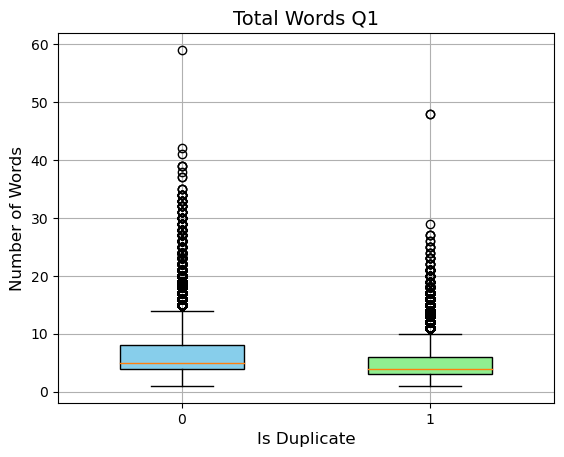

<Figure size 300x200 with 0 Axes>

In [19]:
data = {'0' : df_0[features[0]], '1' : df_1[features[0]]}

fig, ax = plt.subplots()

bplot = ax.boxplot( data.values(),
                    showfliers = show_outliers,
                    patch_artist = True,
                    widths = box_width )

ax.set_xticklabels(data.keys())
applyColor(bplot)

plt.grid(visible = 'True')
plt.title(features[0].replace("_", " ").title(), fontsize = title_size)
plt.xlabel('Is Duplicate', fontsize = axis_label_size)
plt.ylabel('Number of Words', fontsize = axis_label_size)
plt.figure(figsize = fig_size)
plt.show()

In [20]:
print(features[0].replace("_", " ").title() + ' Labelled 0')
print(df_0[features[0]].describe())

print('\n' + features[0].replace("_", " ").title() + ' Labelled 1')
print(df_1[features[0]].describe())

Total Words Q1 Labelled 0
count    149250.000000
mean          6.102332
std           3.413219
min           1.000000
25%           4.000000
50%           5.000000
75%           8.000000
max          59.000000
Name: total_words_q1, dtype: float64

Total Words Q1 Labelled 1
count    149263.000000
mean          4.978092
std           2.427293
min           1.000000
25%           3.000000
50%           4.000000
75%           6.000000
max          48.000000
Name: total_words_q1, dtype: float64


## 2.2 Total Words Q2

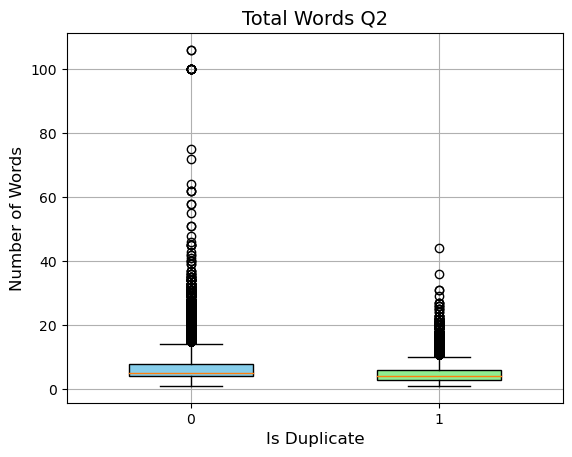

<Figure size 300x200 with 0 Axes>

In [21]:
data = {'0' : df_0[features[1]], '1' : df_1[features[1]]}

fig, ax = plt.subplots()

bplot = ax.boxplot( data.values(),
                    showfliers = show_outliers,
                    patch_artist = True,
                    widths = box_width )

ax.set_xticklabels(data.keys())
applyColor(bplot)

plt.grid(visible = 'True')
plt.title(features[1].replace("_", " ").title(), fontsize = title_size)
plt.xlabel('Is Duplicate', fontsize = axis_label_size)
plt.ylabel('Number of Words', fontsize = axis_label_size)
plt.figure(figsize = fig_size)
plt.show()

In [22]:
print(features[1].replace("_", " ").title() + ' Labelled 0')
print(df_0[features[1]].describe())

print('\n' + features[1].replace("_", " ").title() + ' Labelled 1')
print(df_1[features[1]].describe())

Total Words Q2 Labelled 0
count    149250.000000
mean          6.232777
std           3.881705
min           1.000000
25%           4.000000
50%           5.000000
75%           8.000000
max         106.000000
Name: total_words_q2, dtype: float64

Total Words Q2 Labelled 1
count    149263.000000
mean          4.976364
std           2.415653
min           1.000000
25%           3.000000
50%           4.000000
75%           6.000000
max          44.000000
Name: total_words_q2, dtype: float64


## 2.3 Number of Common Words

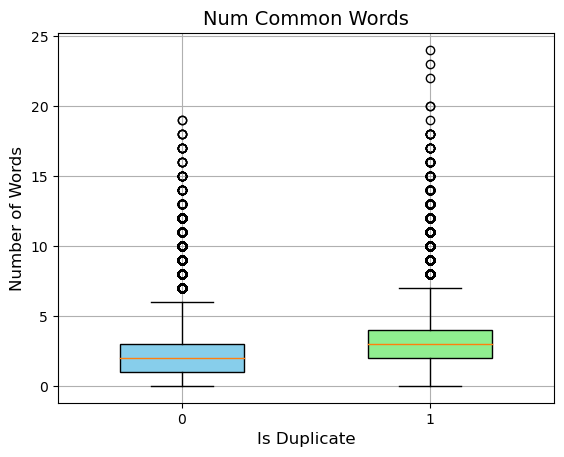

<Figure size 300x200 with 0 Axes>

In [23]:
data = {'0' : df_0[features[2]], '1' : df_1[features[2]]}

fig, ax = plt.subplots()

bplot = ax.boxplot( data.values(),
                    showfliers = show_outliers,
                    patch_artist = True,
                    widths = box_width )

ax.set_xticklabels(data.keys())
applyColor(bplot)

plt.grid(visible = 'True')
plt.title(features[2].replace("_", " ").title(), fontsize = title_size)
plt.xlabel('Is Duplicate', fontsize = axis_label_size)
plt.ylabel('Number of Words', fontsize = axis_label_size)
plt.figure(figsize = fig_size)
plt.show()

In [24]:
print(features[2].replace("_", " ").title() + ' Labelled 0')
print(df_0[features[2]].describe())

print('\n' + features[2].replace("_", " ").title() + ' Labelled 1')
print(df_1[features[2]].describe())

Num Common Words Labelled 0
count    149250.000000
mean          2.366305
std           1.766428
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          19.000000
Name: num_common_words, dtype: float64

Num Common Words Labelled 1
count    149263.000000
mean          3.231022
std           1.507061
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          24.000000
Name: num_common_words, dtype: float64


## 2.4 Common Words Percentage

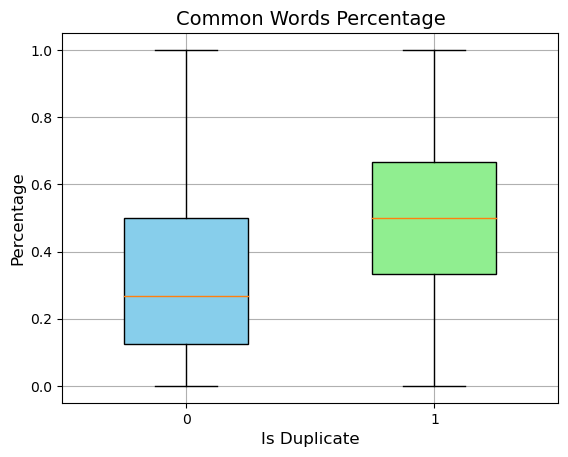

<Figure size 300x200 with 0 Axes>

In [25]:
data = {'0' : df_0[features[3]], '1' : df_1[features[3]]}

fig, ax = plt.subplots()

bplot = ax.boxplot( data.values(),
                    showfliers = show_outliers,
                    patch_artist = True,
                    widths = box_width )

ax.set_xticklabels(data.keys())
applyColor(bplot)

plt.grid(visible = 'True')
plt.title(features[3].replace("_", " ").title(), fontsize = title_size)
plt.xlabel('Is Duplicate', fontsize = axis_label_size)
plt.ylabel('Percentage', fontsize = axis_label_size)
plt.figure(figsize = fig_size)
plt.show()

In [26]:
print(features[3].replace("_", " ").title() + ' Labelled 0')
print(df_0[features[3]].describe())

print('\n' + features[3].replace("_", " ").title() + ' Labelled 1')
print(df_1[features[3]].describe())

Common Words Percentage Labelled 0
count    149250.000000
mean          0.316283
std           0.246278
min           0.000000
25%           0.125000
50%           0.266667
75%           0.500000
max           1.000000
Name: common_words_percentage, dtype: float64

Common Words Percentage Labelled 1
count    149263.000000
mean          0.541070
std           0.236189
min           0.000000
25%           0.333333
50%           0.500000
75%           0.666667
max           1.000000
Name: common_words_percentage, dtype: float64


## 2.5 Fuzz Ratio

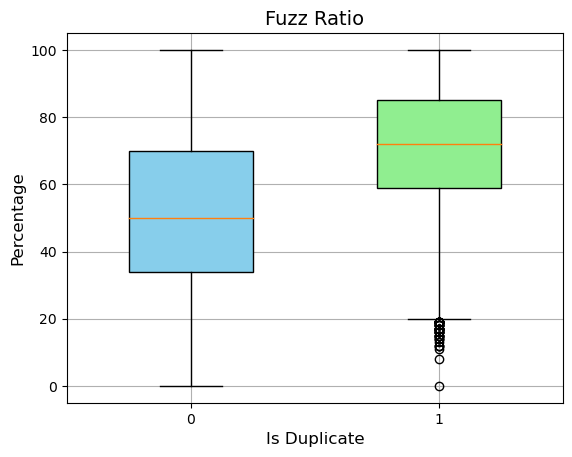

<Figure size 300x200 with 0 Axes>

In [27]:
data = {'0' : df_0[features[4]], '1' : df_1[features[4]]}

fig, ax = plt.subplots()

bplot = ax.boxplot( data.values(),
                    showfliers = show_outliers,
                    patch_artist = True,
                    widths = box_width )

ax.set_xticklabels(data.keys())
applyColor(bplot)

plt.grid(visible = 'True')
plt.title(features[4].replace("_", " ").title(), fontsize = title_size)
plt.xlabel('Is Duplicate', fontsize = axis_label_size)
plt.ylabel('Percentage', fontsize = axis_label_size)
plt.figure(figsize = fig_size)
plt.show()

In [28]:
print(features[4].replace("_", " ").title() + ' Labelled 0')
print(df_0[features[4]].describe())

print('\n' + features[4].replace("_", " ").title() + ' Labelled 1')
print(df_1[features[4]].describe())

Fuzz Ratio Labelled 0
count    149250.000000
mean         52.540784
std          22.522437
min           0.000000
25%          34.000000
50%          50.000000
75%          70.000000
max         100.000000
Name: fuzz_ratio, dtype: float64

Fuzz Ratio Labelled 1
count    149263.000000
mean         71.925702
std          17.309185
min           0.000000
25%          59.000000
50%          72.000000
75%          85.000000
max         100.000000
Name: fuzz_ratio, dtype: float64


## 2.6 Fuzz Partial Ratio

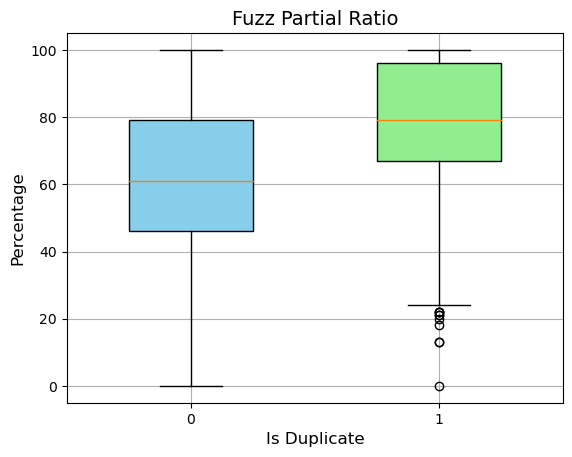

<Figure size 300x200 with 0 Axes>

In [29]:
data = {'0' : df_0[features[5]], '1' : df_1[features[5]]}

fig, ax = plt.subplots()

bplot = ax.boxplot( data.values(),
                    showfliers = show_outliers,
                    patch_artist = True,
                    widths = box_width )

ax.set_xticklabels(data.keys())
applyColor(bplot)

plt.grid(visible = 'True')
plt.title(features[5].replace("_", " ").title(), fontsize = title_size)
plt.xlabel('Is Duplicate', fontsize = axis_label_size)
plt.ylabel('Percentage', fontsize = axis_label_size)
plt.figure(figsize = fig_size)
plt.show()

In [30]:
print(features[5].replace("_", " ").title() + ' Labelled 0')
print(df_0[features[5]].describe())

print('\n' + features[5].replace("_", " ").title() + ' Labelled 1')
print(df_1[features[5]].describe())

Fuzz Partial Ratio Labelled 0
count    149250.000000
mean         62.724355
std          21.548482
min           0.000000
25%          46.000000
50%          61.000000
75%          79.000000
max         100.000000
Name: fuzz_partial_ratio, dtype: float64

Fuzz Partial Ratio Labelled 1
count    149263.000000
mean         79.136785
std          16.150618
min           0.000000
25%          67.000000
50%          79.000000
75%          96.000000
max         100.000000
Name: fuzz_partial_ratio, dtype: float64


## 2.7 Fuzz Token Set Ratio

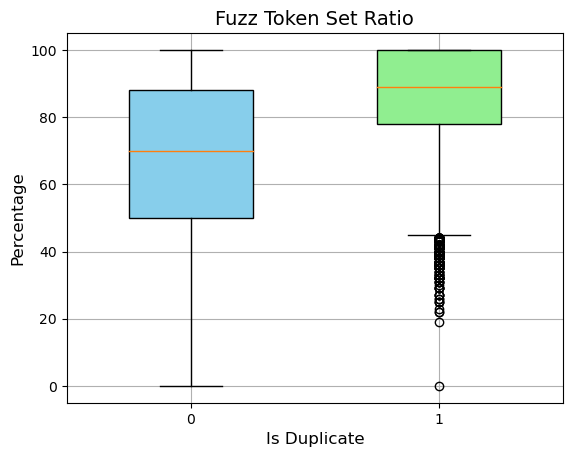

<Figure size 300x200 with 0 Axes>

In [31]:
data = {'0' : df_0[features[6]], '1' : df_1[features[6]]}

fig, ax = plt.subplots()

bplot = ax.boxplot( data.values(),
                    showfliers = show_outliers,
                    patch_artist = True,
                    widths = box_width )

ax.set_xticklabels(data.keys())
applyColor(bplot)

plt.grid(visible = 'True')
plt.title(features[6].replace("_", " ").title(), fontsize = title_size)
plt.xlabel('Is Duplicate', fontsize = axis_label_size)
plt.ylabel('Percentage', fontsize = axis_label_size)
plt.figure(figsize = fig_size)
plt.show()

In [32]:
print(features[6].replace("_", " ").title() + ' Labelled 0')
print(df_0[features[6]].describe())

print('\n' + features[6].replace("_", " ").title() + ' Labelled 1')
print(df_1[features[6]].describe())

Fuzz Token Set Ratio Labelled 0
count    149250.000000
mean         67.159430
std          24.631633
min           0.000000
25%          50.000000
50%          70.000000
75%          88.000000
max         100.000000
Name: fuzz_token_set_ratio, dtype: float64

Fuzz Token Set Ratio Labelled 1
count    149263.000000
mean         86.804479
std          13.527755
min           0.000000
25%          78.000000
50%          89.000000
75%         100.000000
max         100.000000
Name: fuzz_token_set_ratio, dtype: float64


## 2.8 Fuzz Token Sort Ratio

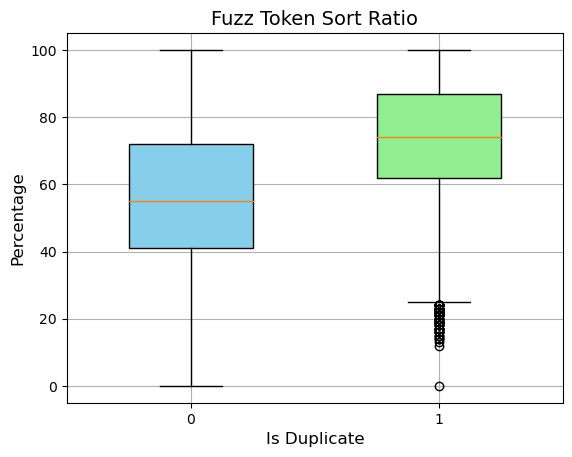

<Figure size 300x200 with 0 Axes>

In [33]:
data = {'0' : df_0[features[7]], '1' : df_1[features[7]]}

fig, ax = plt.subplots()

bplot = ax.boxplot( data.values(),
                    showfliers = show_outliers,
                    patch_artist = True,
                    widths = box_width )

ax.set_xticklabels(data.keys())
applyColor(bplot)

plt.grid(visible = 'True')
plt.title(features[7].replace("_", " ").title(), fontsize = title_size)
plt.xlabel('Is Duplicate', fontsize = axis_label_size)
plt.ylabel('Percentage', fontsize = axis_label_size)
plt.figure(figsize = fig_size)
plt.show()

In [34]:
print(features[7].replace("_", " ").title() + ' Labelled 0')
print(df_0[features[7]].describe())

print('\n' + features[7].replace("_", " ").title() + ' Labelled 1')
print(df_1[features[7]].describe())

Fuzz Token Sort Ratio Labelled 0
count    149250.000000
mean         56.082492
std          21.134211
min           0.000000
25%          41.000000
50%          55.000000
75%          72.000000
max         100.000000
Name: fuzz_token_sort_ratio, dtype: float64

Fuzz Token Sort Ratio Labelled 1
count    149263.000000
mean         74.359346
std          16.251818
min           0.000000
25%          62.000000
50%          74.000000
75%          87.000000
max         100.000000
Name: fuzz_token_sort_ratio, dtype: float64


## 2.9 First Word Same

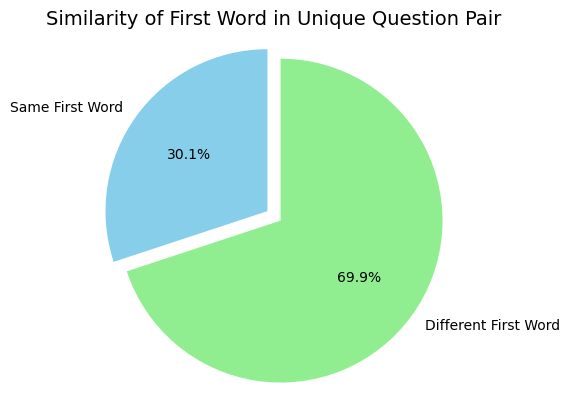

<Figure size 300x200 with 0 Axes>

In [35]:
unique_diff = np.sum(df_0[features[8]]==0)
unique_same = np.sum(df_0[features[8]]==1)

plt.pie( [unique_same, unique_diff],
         labels = ['Same First Word', 'Different First Word'],
         explode = [0.1, 0],
         autopct = '%1.1f%%',
         startangle = 90,
         colors = pie_colors )

plt.title('Similarity of First Word in Unique Question Pair', fontsize = title_size)
plt.axis('equal')
plt.figure(figsize = fig_size)
plt.show()

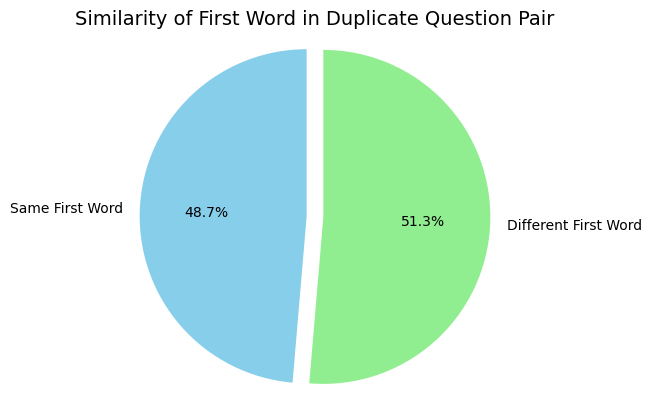

<Figure size 300x200 with 0 Axes>

In [36]:
duplicate_diff = np.sum(df_1[features[8]]==0)
duplicate_same = np.sum(df_1[features[8]]==1)

plt.pie( [duplicate_same, duplicate_diff],
         labels = ['Same First Word', 'Different First Word'],
         explode = [0.1, 0],
         autopct = '%1.1f%%',
         startangle = 90,
         colors = pie_colors )

plt.title('Similarity of First Word in Duplicate Question Pair', fontsize = title_size)
plt.axis('equal')
plt.figure(figsize = fig_size)
plt.show()

## 2.10 Last Word Same

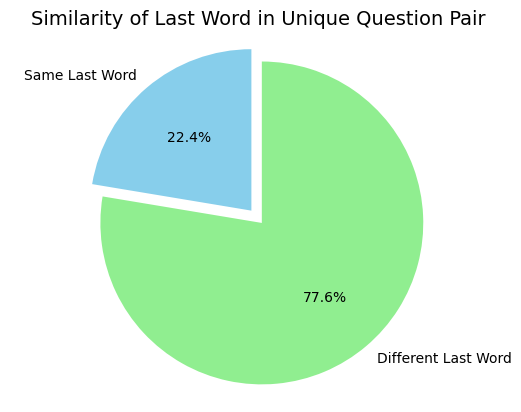

<Figure size 300x200 with 0 Axes>

In [37]:
unique_diff = np.sum(df_0[features[9]]==0)
unique_same = np.sum(df_0[features[9]]==1)

plt.pie( [unique_same, unique_diff],
         labels = ['Same Last Word', 'Different Last Word'],
         explode = [0.1, 0],
         autopct = '%1.1f%%',
         startangle = 90,
         colors = pie_colors )

plt.title('Similarity of Last Word in Unique Question Pair', fontsize = title_size)
plt.axis('equal')
plt.figure(figsize = fig_size)
plt.show()

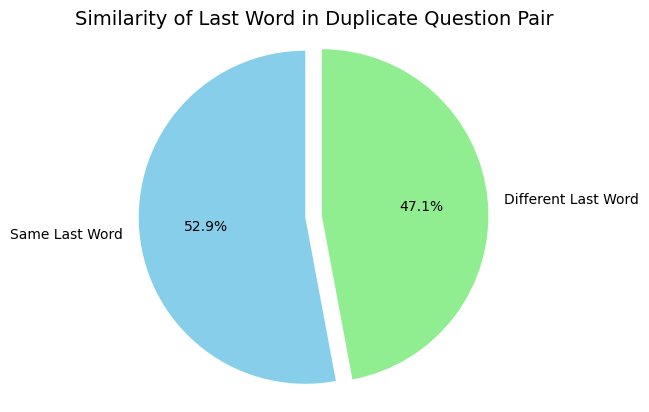

<Figure size 300x200 with 0 Axes>

In [38]:
duplicate_diff = np.sum(df_1[features[9]]==0)
duplicate_same = np.sum(df_1[features[9]]==1)

plt.pie( [duplicate_same, duplicate_diff],
         labels = ['Same Last Word', 'Different Last Word'],
         explode = [0.1, 0],
         autopct = '%1.1f%%',
         startangle = 90,
         colors = pie_colors )

plt.title('Similarity of Last Word in Duplicate Question Pair', fontsize = title_size)
plt.axis('equal')
plt.figure(figsize = fig_size)
plt.show()

## 2.11 Length Difference

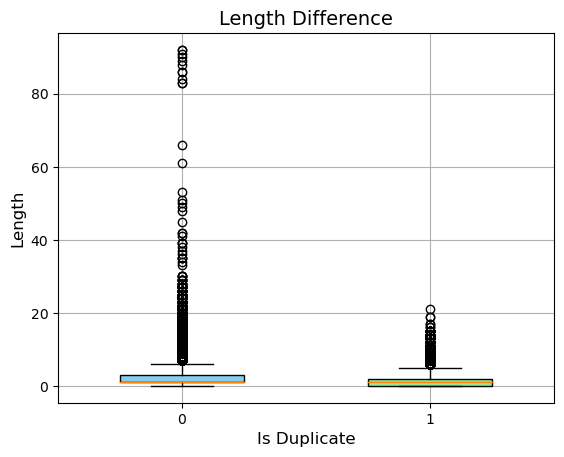

<Figure size 300x200 with 0 Axes>

In [39]:
data = {'0' : df_0[features[10]], '1' : df_1[features[10]]}

fig, ax = plt.subplots()

bplot = ax.boxplot( data.values(),
                    showfliers = show_outliers,
                    patch_artist = True,
                    widths = box_width )

ax.set_xticklabels(data.keys())
applyColor(bplot)

plt.grid(visible = 'True')
plt.title(features[10].replace("_", " ").title(), fontsize = title_size)
plt.xlabel('Is Duplicate', fontsize = axis_label_size)
plt.ylabel('Length', fontsize = axis_label_size)
plt.figure(figsize = fig_size)
plt.show()

In [40]:
print(features[10].replace("_", " ").title() + ' Labelled 0')
print(df_0[features[10]].describe())

print('\n' + features[10].replace("_", " ").title() + ' Labelled 1')
print(df_1[features[10]].describe())

Length Difference Labelled 0
count    149250.000000
mean          2.422573
std           3.042558
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          92.000000
Name: length_difference, dtype: float64

Length Difference Labelled 1
count    149263.000000
mean          1.261960
std           1.473359
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          21.000000
Name: length_difference, dtype: float64


## 2.12 Cosine Similarity

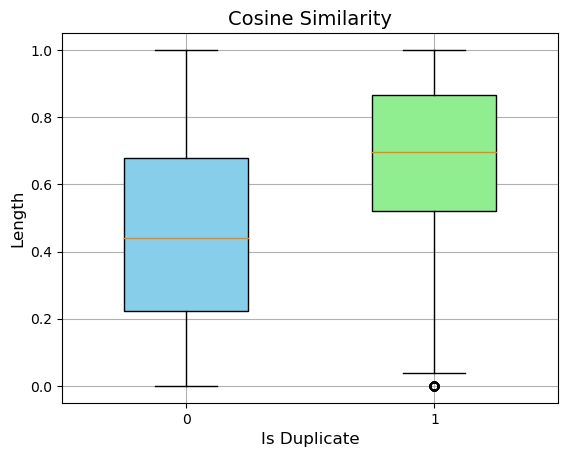

<Figure size 300x200 with 0 Axes>

In [41]:
data = {'0' : df_0[features[11]], '1' : df_1[features[11]]}

fig, ax = plt.subplots()

bplot = ax.boxplot( data.values(),
                    showfliers = show_outliers,
                    patch_artist = True,
                    widths = box_width )

ax.set_xticklabels(data.keys())
applyColor(bplot)

plt.grid(visible = 'True')
plt.title(features[11].replace("_", " ").title(), fontsize = title_size)
plt.xlabel('Is Duplicate', fontsize = axis_label_size)
plt.ylabel('Length', fontsize = axis_label_size)
plt.figure(figsize = fig_size)
plt.show()

In [42]:
print(features[11].replace("_", " ").title() + ' Labelled 0')
print(df_0[features[11]].describe())

print('\n' + features[11].replace("_", " ").title() + ' Labelled 1')
print(df_1[features[11]].describe())

Cosine Similarity Labelled 0
count    149250.000000
mean          0.442959
std           0.288549
min           0.000000
25%           0.222020
50%           0.441492
75%           0.678449
max           1.000000
Name: cosine_similarity, dtype: float64

Cosine Similarity Labelled 1
count    149263.000000
mean          0.683738
std           0.217993
min           0.000000
25%           0.519750
50%           0.694774
75%           0.864666
max           1.000000
Name: cosine_similarity, dtype: float64
